# Homework 02

**Bernard Mwamburi**

## Preparing the Environment

Use the cell below to import NumPy, Pandas, and the Pyplot library of Matplotlib, using the standard aliases. Also import the following tools from Scikit-Learn: `LogisticRegresion`, `StandardScaler`, `cross_val_score`, `cross_val_predict`, `classification_report`, `confusion_matrix`, and `RocCurveDisplay`. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, roc_curve, precision_recall_curve
%matplotlib inline

# Part 1: Breast Cancer Dataset

In Part 1, you will be working with oncological data to build a model that classifies breast cancer tumors as "malignant" or "benign". You can find more information about the dataset, including a description of the features here: [Kaggle: Wisconsin Breast Cancer Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

Use the cell below to load the dataset `breast_cancer.csv` into a DataFrame. Shuffle the DataFrame (setting `random_state=1`), print its shape, and then display the head of the DataFrame. 


In [2]:
cancer = pd.read_csv("breast_cancer.csv")
cancer = cancer.sample(frac=1, random_state=1)
print(cancer.shape)
cancer.head()

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
421,906564,B,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,...,16.46,18.34,114.10,809.2,0.1312,0.36350,0.3219,0.11080,0.2827,0.09208
47,85715,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.1786,0.41660,0.5006,0.20880,0.3900,0.11790
292,891670,B,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,...,13.74,19.93,88.81,585.4,0.1483,0.20680,0.2241,0.10560,0.3380,0.09584
186,874217,M,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,...,21.31,26.36,139.20,1410.0,0.1234,0.24450,0.3538,0.15710,0.3206,0.06938
414,905680,M,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,...,17.26,36.91,110.10,931.4,0.1148,0.09866,0.1547,0.06575,0.3233,0.06165


Use the cell below to print the names of the columns of the DataFrame. 

In [3]:
cancer.columns.values

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

The `diagnosis` column will represent our label. The `id` column is a unique identifier for rows and will be ignored. All other columns represent numerical features. 

Use the `value_counts` method to display a DataFrame showing the proportions of observations with each class ('B' or 'M'). **Note:** There is an example of this is Lesson 02. 

In [4]:
cancer.diagnosis.value_counts(normalize=True).to_frame()

,diagnosis
B,0.627417
M,0.372583


Create a feature array and a label array. Name these `X1` and `y1`, or something similar.

In [5]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
            'area_mean', 'smoothness_mean', 'compactness_mean',
            'concavity_mean', 'concave points_mean', 'symmetry_mean',
            'fractal_dimension_mean', 'radius_se', 'texture_se',
            'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
            'concavity_se', 'concave points_se', 'symmetry_se',
            'fractal_dimension_se', 'radius_worst', 'texture_worst',
            'perimeter_worst', 'area_worst', 'smoothness_worst',
            'compactness_worst', 'concavity_worst', 'concave points_worst',
            'symmetry_worst', 'fractal_dimension_worst']
X1 = cancer[features]
y1 = cancer.diagnosis

In [6]:
X1.shape

(569, 30)

Create an instance of `StandardScaler` and use it to scale the feature array. Provide a different name for the scaled feature array. 

In [7]:
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

Perform the following steps in the cell below: (1) Create an instance of `LogisticRegression`, (2) train it on dataset (using the scaled features), (3) print the model's training accuracy.

**Note**: If you receive a warning about convergence, increase the `max_iter` parameter until the warning goes away. 

In [8]:
logReg = LogisticRegression(penalty=None, max_iter=500)
logReg.fit(X1_scaled, y1)
print(f"Training accuracy: {logReg.score(X1_scaled, y1)}")

Training accuracy: 1.0


Use `cross_val_score` to perform 10-fold cross validation to estimate the model's accuracy on out-of-sample observations. Print the CV score. You don't need print the scores for the different folds. If you receive convergence warnings, you might need to further increase `max_iter` from the previous cell. 

In [9]:
print(f"Cross Validation score: {cross_val_score(logReg, X1_scaled, y1, scoring='accuracy', cv=10).mean()}")

Cross Validation score: 0.9543233082706767


Use `cross_val_predict` to generate out-of-sample class predictions for the dataset. Then use it again to create out-of-sample class probability estimates for the dataset. Use 10-fold CV in both cases and stored the results in arrays. Print the shapes of these two arrays. 

In [10]:
cv_predict = cross_val_predict(logReg, X1_scaled, y1, cv=10)
cv_pred_proba = cross_val_predict(logReg, X1_scaled, y1, cv=10, method='predict_proba')

print(cv_predict.shape)
print(cv_pred_proba.shape)

(569,)
(569, 2)


Use the out-of-sample class predictions to create a confusion matrix. Display the confusion matrix as a DataFrame, with rows and columns named `'B'` and `'M'`. 

In [11]:
cm = confusion_matrix(y1, cv_predict)
pd.DataFrame(cm, columns=['B', 'M'], index=['B', 'M'])

,B,M
B,343,14
M,12,200


Use the out-of-sample class predictions to display a classification report. 

In [12]:
print(classification_report(y1, cv_predict))

              precision    recall  f1-score   support

           B       0.97      0.96      0.96       357
           M       0.93      0.94      0.94       212

    accuracy                           0.95       569
   macro avg       0.95      0.95      0.95       569
weighted avg       0.95      0.95      0.95       569



Use the out-of-sample class probability estimates to dispay an ROC curve. You will need to set `pos_label='M'`. 

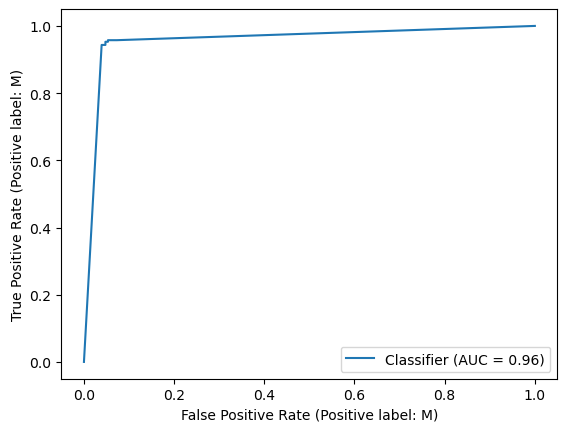

In [13]:
roc_curve = RocCurveDisplay.from_predictions(y1, cv_pred_proba[:,1], pos_label='M')

Use `cross_val_score` to perform 10-fold cross validation to estimate the model's AUC score on out-of-sample observations. Print the CV score. You don't need print the scores for the different folds.

In [14]:
print(f"Cross validation score: {cross_val_score(logReg, X1_scaled, y1, cv=10, scoring='roc_auc').mean()}")

Cross validation score: 0.9843585515014086


y1_pred = cross_val_predict(logReg, X1_scaled, y1, method='decision_function')

precisions, recalls, thresholds = precision_recall_curve(y1, y1_pred)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

# Part 2: Mobile Device Data

In Part 2, you will be working with a synthetic dataset containing information about several mobile devices. Your goal is to build a model to predict which of four price groups a mobile device falls into based on its characteristics. You can find more information about the dataset, including a description of the features here: [Kaggle: Mobile Price Classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification) 

Use the cell below to load the dataset `mobile.csv` into a DataFrame. Shuffle the DataFrame (setting random_state=1), print its shape, and then display the head of the DataFrame.

In [15]:
mobile = pd.read_csv('mobile.csv')
mobile = mobile.sample(frac=1, random_state=1)
print(mobile.shape)
mobile.head()

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_group
674,1034,0,2.6,1,2,1,45,0.3,190,3,...,182,1293,969,15,1,7,1,0,0,Group 0
1699,1002,1,1.8,0,1,0,45,0.7,180,7,...,948,1007,1234,19,13,18,1,1,0,Group 0
1282,609,1,0.5,0,4,1,10,0.1,81,6,...,113,1524,1905,16,3,18,1,1,1,Group 1
1315,1510,0,0.6,1,1,0,32,0.7,135,3,...,963,1520,854,8,2,10,1,0,1,Group 1
1210,805,1,1.7,1,0,1,58,0.9,168,3,...,81,1544,3397,7,6,2,1,0,0,Group 2


Use the cell below to print the names of the columns of the DataFrame.

In [16]:
mobile.columns.values

array(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_group'], dtype=object)

The `price_group` column will represent our label. All other columns represent numerical features.

Use the value_counts method to display a DataFrame showing the proportions of observations with each class. Note: There is an example of this is Lesson 02.

In [17]:
mobile.price_group.value_counts(normalize=True).to_frame()

,price_group
Group 0,0.25
Group 1,0.25
Group 2,0.25
Group 3,0.25


Create a feature array and a label array. Name these `X2` and `y2`, or something similar.

In [18]:
features2 = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
             'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
             'touch_screen', 'wifi']

X2 = mobile[features2]
y2 = mobile.price_group

Create an instance of `StandardScaler` and use it to scale the feature array. Provide a different name for the scaled feature array.

In [19]:
scaler2 = StandardScaler()

X2_scaled = scaler2.fit_transform(X2)

Perform the following steps in the cell below: (1) Create an instance of `LogisticRegression`, (2) train it on dataset (using the scaled features), (3) print the model's training accuracy.

Note: If you receive a warning about convergence, increase the max_iter parameter until the warning goes away.

In [20]:
logReg2 = LogisticRegression(penalty=None, max_iter=20000)

logReg2.fit(X2_scaled, y2)
print(f"Training Accuracy: {logReg2.score(X2_scaled, y2)}")

Training Accuracy: 0.99


Use `cross_val_score` to perform 10-fold cross validation to estimate the model's accuracy on out-of-sample observations. Print the CV score. You don't need print the scores for the different folds. If you receive convergence warnings, you might need to further increase `max_iter` from the previous cell. 

In [21]:
print(f"Cross Validation Score: {cross_val_score(logReg2, X2_scaled, y2, scoring='accuracy', cv=10).mean()}")

Cross Validation Score: 0.966


Use `cross_val_predict` to generate out-of-sample class predictions for the dataset, using 10-fold CV. Using the same cell, then use the out-of-sample class predictions to create a confusion matrix. Display the confusion matrix as a DataFrame, with rows and columns named 0, 1, 2, and 3. 

In [22]:
cv_predict2 = cross_val_predict(logReg2, X2_scaled, y2, cv=10)

cm2 = confusion_matrix(y2, cv_predict2)
pd.DataFrame(cm2, index=[0,1,2,3], columns=[0,1,2,3])

,0,1,2,3
0,489,11,0,0
1,12,479,9,0
2,0,12,477,11
3,0,0,13,487


Use the out-of-sample class predictions to display a classification report.

In [23]:
print(classification_report(y2, cv_predict2))

              precision    recall  f1-score   support

     Group 0       0.98      0.98      0.98       500
     Group 1       0.95      0.96      0.96       500
     Group 2       0.96      0.95      0.95       500
     Group 3       0.98      0.97      0.98       500

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

